# Table of Contents
0. [Business Problem](#problem)
1. [Set up the environment](#setup)
2. [Data Preprocessing](#data_preprocessing)
> a. [Import the dataset](#import_data) <br>
> b. [Add Headers](#headers) <br>
> c. [Identify and Handle Missing Data](#missing_data) <br>
> d. [Data Type Validation](#data_validation) <br>
> e. [Exploratory Data Analysis](#data_analysis) <br>
> f. [Encoding the categorical variables](#encoding)<br>
> g. [Define the dependent and independent variables](#define_variables)<br>
> h. [Splitting the dataset into training and testing datasets](#split)<br>
3. [Model Development](#model_development)
> a. [Simple Linear Regression](#simple)<br>
> b. [Multiple Linear Regression](#multiple)<br>
> c. [Polynomial Linear Regression](#poly)<br>
> d. [Support Vector Regression](#svr)<br>
> e. [Decision Tree Regression](#tree)<br>
4. [Model Evaluation and Selection](#eval)<br>
5. [Conclusion](#conc)

## Business Problem <a id='problem'>
The motive behind this project is the high student failure rates in core classes such as Mathematics and Portuguese in the Portuguese education system.<br>
    
The project proposes using Business Intelligence (BI)/Data Mining (DM) techniques to approach student achievement in secondary education. <br>
    
The objective is to extract high-level knowledge from raw data to aid the education domain and develop more efficient student prediction tools to improve the quality of education and enhance school resource management. <br>
    
The business problem, therefore, is the need to improve student achievement in core classes and develop more efficient tools to aid the education domain in Portugal.

## Import necessary libraries for data manipulation <a id='setup'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing <a id='data_preprocessing'>

### Import the dataset <a id='import_data'>
- pandas acceptsa wide variety of file formats that can read data from (CSV - JSON - HTML - Excel - SQL - Pickle Files).
- In our case the data is formatted in csv file, so we import the dataset using `pd.read_csv()` function.
- `pd.read_csv()` accepts many atrributes can be accessed through `pd.read_csv?`
- In our case we used `delimeter=';'` option because the default is `delimeter=','`

In [2]:
# read the dataset (math scores)
math_dataset = pd.read_csv('/Users/zaghloul2012/Desktop/student_performance/student/student-mat.csv', delimiter=';')

In [3]:
# explore the top rows of the dataset to ensure that it's imported correctly and get familiar with it using pd.DataFrame.head()
math_dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Explore the shape of the dataset using `pd.DataFrame.shape` where it return tuple
- The first entry is the number of observations (rows)
- The second entry is the number of attributes (columns)

In [4]:
math_dataset.shape

(395, 33)

### Add Headers <a id='headers'>
- I noticed that there are some columns has names that may be misleading so we will replace the headers with more meaningful headers
- More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

In [5]:
# define a list of the new colummn names
new_header = ['school', 'sex', 'age', 'address_type', 'family_size', 'parent_status', 'mother_education', 
           'father_education', 'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time',
           'past_failures', 'school_support', 'family_support', 'extra_class', 'activities', 'nursery_school',
           'higher_education', 'home_internet', 'romantic_relationship', 'family_relationship', 'free_time', 
           'go_out', 'workday_alcohol', 'weekend_alcohol', 'health_status', 'absences', 'G1', 'G2', 'G3']

In [6]:
# apply the new header by assiging them to column names
math_dataset.columns = new_header

### Identifying and handling any missing data <a id='missing_data'>

In [7]:
math_dataset.head(10)

,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,...,family_relationship,free_time,go_out,workday_alcohol,weekend_alcohol,health_status,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [8]:
# check if there is any missing data
math_dataset.isna().sum()

school                   0
sex                      0
age                      0
address_type             0
family_size              0
parent_status            0
mother_education         0
father_education         0
mother_job               0
father_job               0
reason                   0
guardian                 0
travel_time              0
study_time               0
past_failures            0
school_support           0
family_support           0
extra_class              0
activities               0
nursery_school           0
higher_education         0
home_internet            0
romantic_relationship    0
family_relationship      0
free_time                0
go_out                   0
workday_alcohol          0
weekend_alcohol          0
health_status            0
absences                 0
G1                       0
G2                       0
G3                       0
dtype: int64

Because dataset was used before in [USING DATA MINING TO PREDICT
SECONDARY SCHOOL STUDENT PERFORMANCE](http://www3.dsi.uminho.pt/pcortez/student.pdf), all missing data was handled but in general missing data can be handled through many options
- Drop the observation that contain missing data (if the dataset size is big enough so that it won't make any problem)
- Drop the column if there are alot of missing data in this row and it won't affect alot on our model
- Replace the missing data based on mean, frequency or any other suitable way

### Data Type Validation <a id='data_validation'>
- It's important to check data types to ensure that it won't produce unexpected results
- pandas offers `pd.DataFrame.dtypes` to check the data type of each column

In [9]:
# check data types of each column
math_dataset.dtypes

school                   object
sex                      object
age                       int64
address_type             object
family_size              object
parent_status            object
mother_education          int64
father_education          int64
mother_job               object
father_job               object
reason                   object
guardian                 object
travel_time               int64
study_time                int64
past_failures             int64
school_support           object
family_support           object
extra_class              object
activities               object
nursery_school           object
higher_education         object
home_internet            object
romantic_relationship    object
family_relationship       int64
free_time                 int64
go_out                    int64
workday_alcohol           int64
weekend_alcohol           int64
health_status             int64
absences                  int64
G1                        int64
G2      

We can notice that the dataset is basically contains `int` and `str` objects but we will handle `str` objects so that we can deal with it in the model 

### Exploring and visualizing some important features <a id='data_analysis'>
We will start by exploring the correlations between variables 

In [10]:
math_dataset.corr()

,age,mother_education,father_education,travel_time,study_time,past_failures,family_relationship,free_time,go_out,workday_alcohol,weekend_alcohol,health_status,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
mother_education,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
father_education,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
travel_time,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
study_time,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
past_failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
family_relationship,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
free_time,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
go_out,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
workday_alcohol,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


Visualizing some important variables

Text(0.5, 1.0, 'Count of Gabriel Pereira(GP) VS. Mousinho da Silveira(MS)')

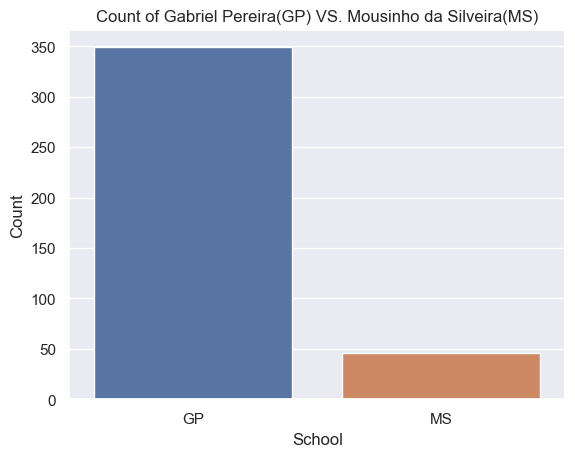

In [11]:
sns.set_theme(style="darkgrid")

# school column
sns.countplot(x='school', data=math_dataset)
plt.xlabel('School')
plt.ylabel('Count')
plt.title("Count of Gabriel Pereira(GP) VS. Mousinho da Silveira(MS)")

Text(0.5, 1.0, 'Count of females(F) VS. males(M)')

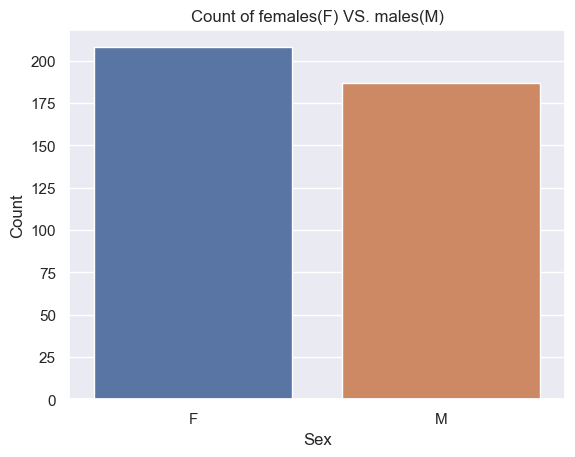

In [12]:
# sex column
sns.countplot(x='sex', data=math_dataset)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of females(F) VS. males(M)')

Text(0.5, 1.0, 'Distribution of age')

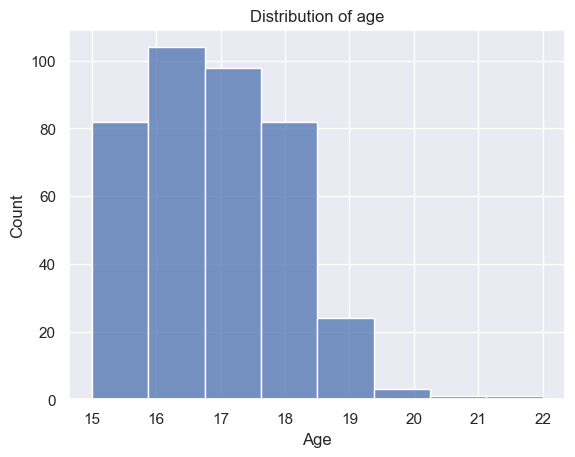

In [13]:
# age column
sns.histplot(x='age', data=math_dataset, bins=8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of age')

Text(0.5, 1.0, 'Student home address type Urban(U) vs. Rural(R)')

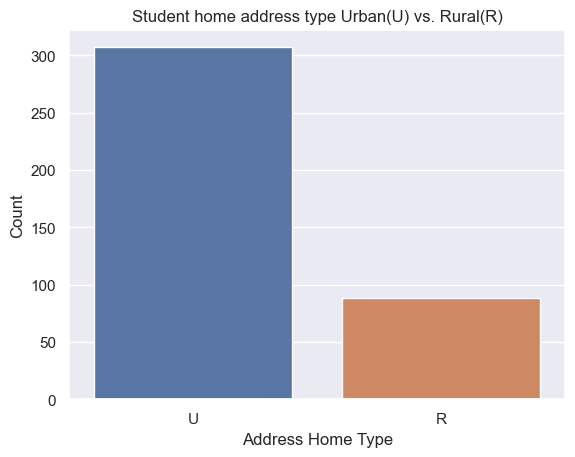

In [14]:
# address column
sns.countplot(x='address_type', data=math_dataset)
plt.xlabel('Address Home Type')
plt.ylabel('Count')
plt.title('Student home address type Urban(U) vs. Rural(R)')

Text(0.5, 1.0, 'Reason to choose this school')

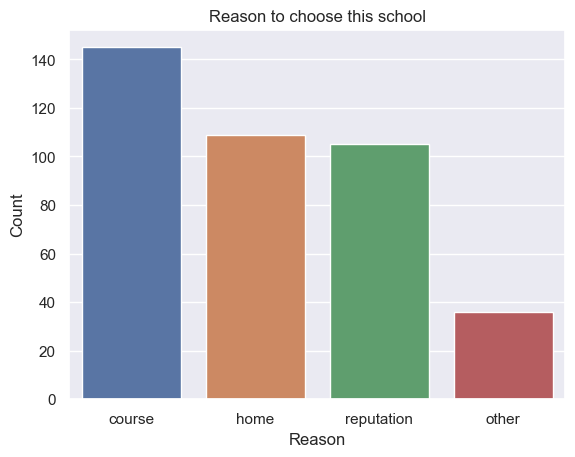

In [15]:
# reason column
sns.countplot(x='reason', data=math_dataset, order=['course', 'home', 'reputation', 'other'])
plt.xlabel('Reason')
plt.ylabel('Count')
plt.title('Reason to choose this school')

Text(0.5, 1.0, 'Weekly study time')

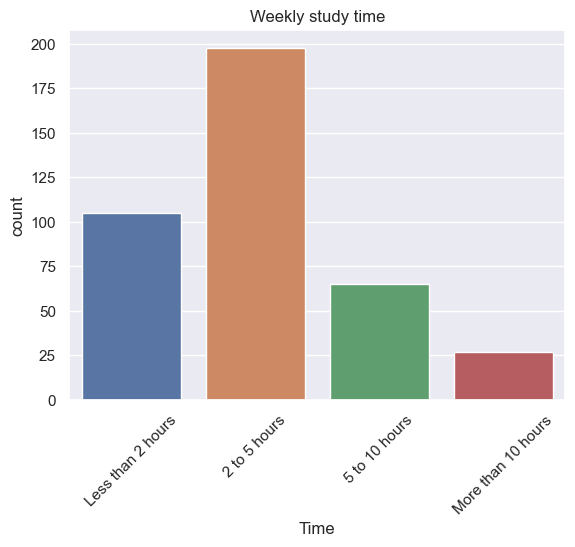

In [16]:
# reason column
sns.countplot(x='study_time', data=math_dataset)
plt.xlabel('Time')
plt.xticks([0,1,2,3],['Less than 2 hours', '2 to 5 hours', '5 to 10 hours', 'More than 10 hours'], rotation=45)
plt.title('Weekly study time')

Text(0.5, 1.0, 'First Period Scores distribution')

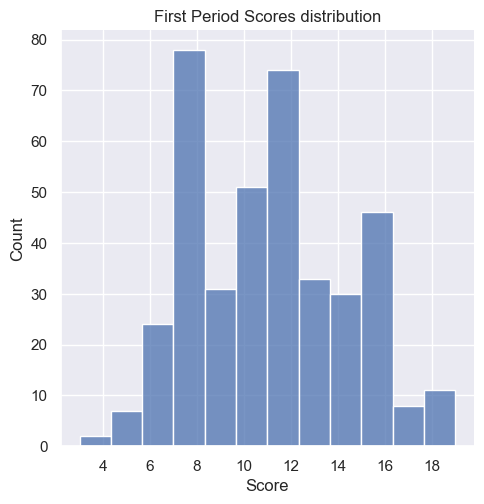

In [17]:
# G1 column
sns.displot(x='G1', data=math_dataset)
plt.xlabel('Score')
plt.title('First Period Scores distribution')

Text(0.5, 1.0, 'Second Period Scores distribution')

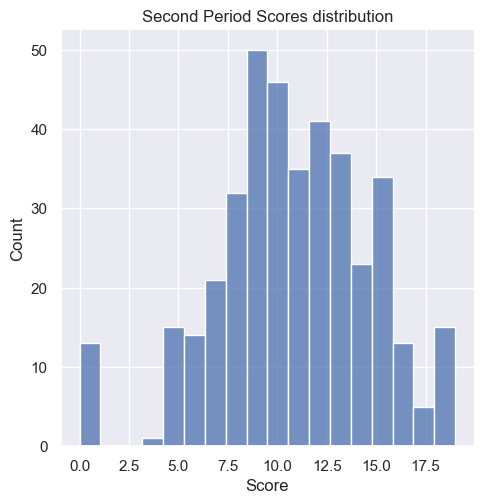

In [18]:
# G2 column
sns.displot(x='G2', data=math_dataset)
plt.xlabel('Score')
plt.title('Second Period Scores distribution')

Text(0.5, 1.0, 'Third Period Scores distribution')

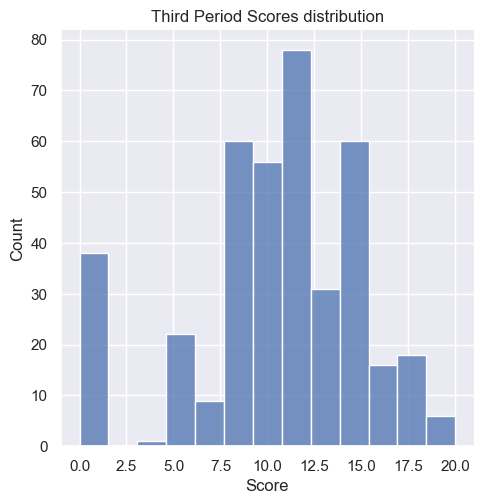

In [19]:
# G3 column
sns.displot(x='G3', data=math_dataset)
plt.xlabel('Score')
plt.title('Third Period Scores distribution')

### Strong Postive Linear relationship
It's noted that scores of students in the first two years affect greatly on their last year score with strong relationship between G2 and G3

In [20]:
math_dataset[['G1', 'G2', 'G3']].corr()

,G1,G2,G3
G1,1.000000,0.852118,0.801468
G2,0.852118,1.000000,0.904868
G3,0.801468,0.904868,1.000000


<AxesSubplot:xlabel='G2', ylabel='G3'>

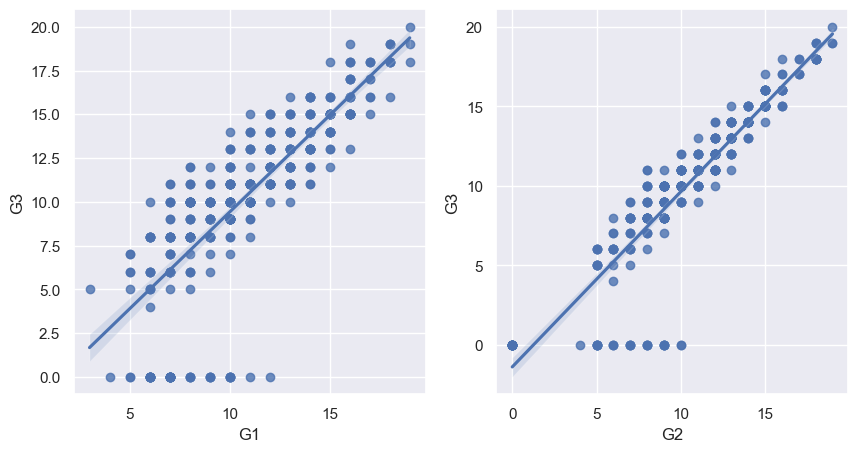

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.regplot(x='G1', y='G3', data=math_dataset, ax=axes[0])
sns.regplot(x='G2', y='G3', data=math_dataset, ax=axes[1])

### Weak Linear relationships


In [22]:
math_dataset[['father_education', 'mother_education', 'G3']].corr()

,father_education,mother_education,G3
father_education,1.000000,0.623455,0.152457
mother_education,0.623455,1.000000,0.217147
G3,0.152457,0.217147,1.000000


<AxesSubplot:xlabel='mother_education', ylabel='G3'>

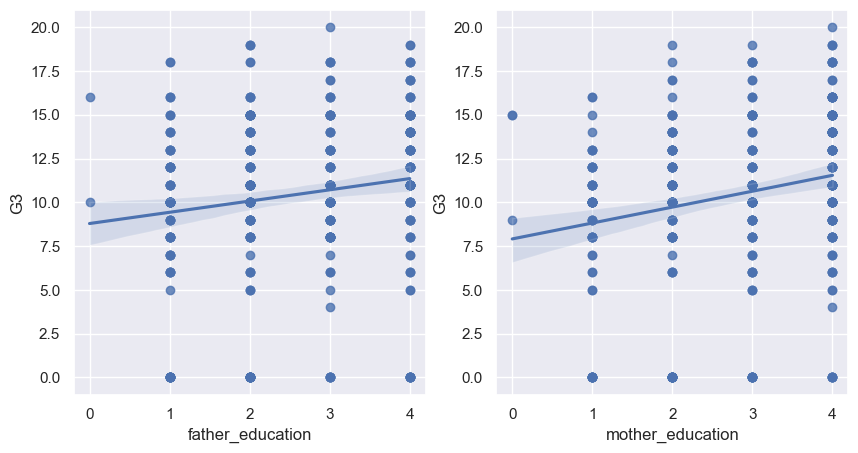

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.regplot(x='father_education', y='G3', data=math_dataset, ax=axes[0])
sns.regplot(x='mother_education', y='G3', data=math_dataset, ax=axes[1])

### Categorical Variables

<AxesSubplot:xlabel='mother_job', ylabel='G3'>

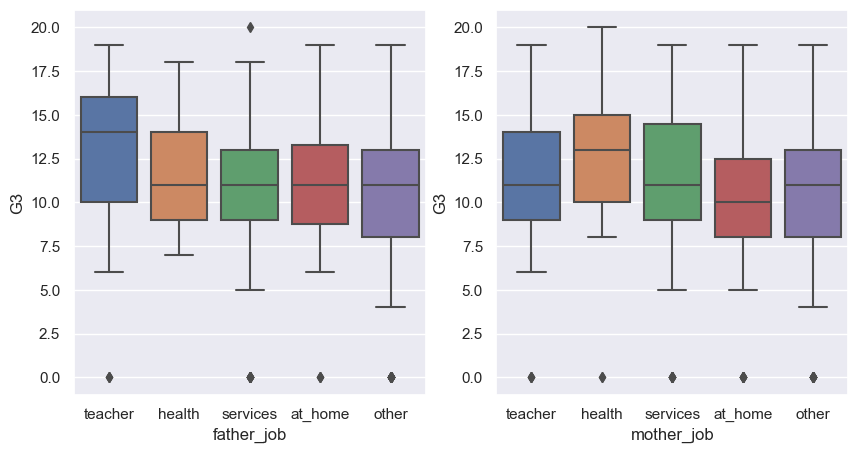

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(x='father_job', y='G3', data=math_dataset, ax=axes[0], order=['teacher', 'health', 'services', 'at_home', 'other'])
sns.boxplot(x='mother_job', y='G3', data=math_dataset, ax=axes[1], order=['teacher', 'health', 'services', 'at_home', 'other'])

There is many overlaps in jobs (father_job and mother_job) which indicate it won't be a good predictor for scores (G3)

<AxesSubplot:xlabel='guardian', ylabel='G3'>

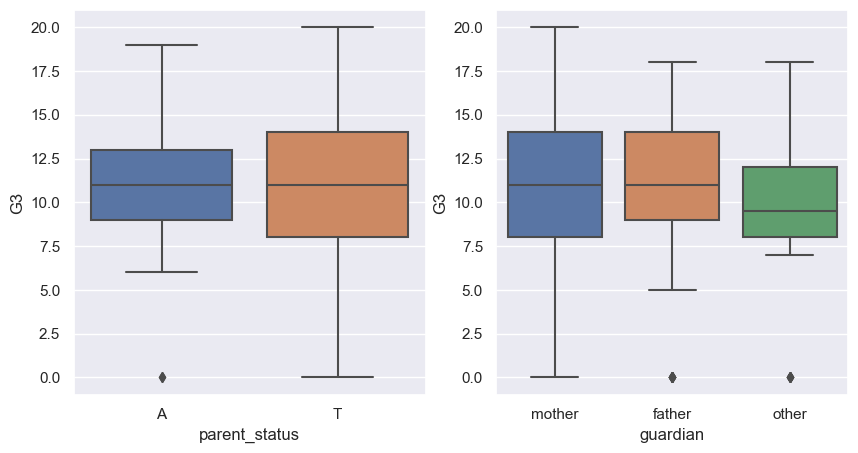

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(x='parent_status', y='G3', data=math_dataset, ax=axes[0])
sns.boxplot(x='guardian', y='G3', data=math_dataset, ax=axes[1])

There is many overlaps in parent_status and guardian which indicate it won't be a good predictor for scores (G3)

<AxesSubplot:xlabel='address_type', ylabel='G3'>

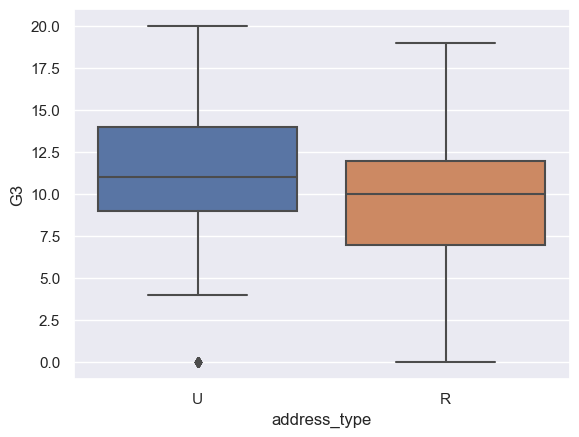

In [26]:
sns.boxplot(x='address_type', y='G3', data=math_dataset)
# There is many overlaps in parent_status and guardian which indicate it won't be a good predictor for scores (G3)

## Descriptive Statistical Analysis
pandas offers `pd.DataFrame.describe()` function that computes basic statistics for all numerical variables

In [27]:
math_dataset.describe()

,age,mother_education,father_education,travel_time,study_time,past_failures,family_relationship,free_time,go_out,workday_alcohol,weekend_alcohol,health_status,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Also it gives us the ability to go over categorical variables

In [28]:
math_dataset.describe(include=['object'])

,school,sex,address_type,family_size,parent_status,mother_job,father_job,reason,guardian,school_support,family_support,extra_class,activities,nursery_school,higher_education,home_internet,romantic_relationship
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


### Encoding the categorical variables <a id='encoding'>
- Our dataset contains alot of categorical variables that need to be encoded to be fed the model to handle it correctly
- There are many ways of encoding the categorical variables where you can learn about them [here](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)
- To summarise we will use three types of econding:
    1. Label Encoding: This method assigns each unique category in a feature with an integer value
    2. One-Hot Encoding: This method creates a binary column for each category in a feature, where each column indicates the presence or absence of that category. 
    3. Ordinal Encoding: This method is similar to label encoding, but it assigns the values based on the order of the categories
    

In [29]:
from sklearn.preprocessing import LabelEncoder


label_encoded_columns = ['school', 'sex', 'address_type', 'parent_status', 'mother_job', 'father_job', 'reason',
                           'guardian', 'school_support', 'family_support', 'extra_class', 'activities', 'nursery_school',
                           'higher_education', 'home_internet', 'romantic_relationship', 'family_size']

le = LabelEncoder()

math_dataset[label_encoded_columns] = math_dataset[label_encoded_columns].apply(lambda col: le.fit_transform(col))

math_dataset

,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,...,family_relationship,free_time,go_out,workday_alcohol,weekend_alcohol,health_status,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [30]:
# Let's ensure that we only have numerical variables that are can be used in our upcoming models
math_dataset.dtypes

school                   int64
sex                      int64
age                      int64
address_type             int64
family_size              int64
parent_status            int64
mother_education         int64
father_education         int64
mother_job               int64
father_job               int64
reason                   int64
guardian                 int64
travel_time              int64
study_time               int64
past_failures            int64
school_support           int64
family_support           int64
extra_class              int64
activities               int64
nursery_school           int64
higher_education         int64
home_internet            int64
romantic_relationship    int64
family_relationship      int64
free_time                int64
go_out                   int64
workday_alcohol          int64
weekend_alcohol          int64
health_status            int64
absences                 int64
G1                       int64
G2                       int64
G3      

### Define the dependent and independent variables <a id='define_variables'>
The dependent variable is the variable that we are trying to predict or model, while the independent variables are the variables that we use to make predictions.

In [31]:
X = math_dataset.iloc[:, :-1].values
y = math_dataset.iloc[: , -1].values

In [32]:
# check the independent variables
X

array([[ 0,  0, 18, ...,  6,  5,  6],
       [ 0,  0, 17, ...,  4,  5,  5],
       [ 0,  0, 15, ..., 10,  7,  8],
       ...,
       [ 1,  1, 21, ...,  3, 10,  8],
       [ 1,  1, 18, ...,  0, 11, 12],
       [ 1,  1, 19, ...,  5,  8,  9]])

In [33]:
# check the dependent variables
y

array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9,  0, 18,  0,  0, 12, 11,  0,  0,
        0,  0, 12, 15,  0,  9, 11, 13,  0, 11,  0, 11,  0, 10,  0, 14, 10,
        0, 12,  8, 13, 10, 15, 12,  0,  7,  0, 10,  7, 12, 10, 16,  0, 14,
        0, 16, 10,  0,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11,
       15,  9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6,
       11,  9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6,
        0, 17, 13, 14,  7

### Splitting the dataset into training set and testing set <a id='split'>
The training dataset will be used to train the model, while the testing dataset will be used to evaluate the model's performance.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
#check X_train
X_train

array([[ 0,  1, 16, ...,  0, 13, 13],
       [ 0,  0, 19, ...,  0, 10,  9],
       [ 0,  1, 15, ...,  2, 10, 10],
       ...,
       [ 0,  0, 15, ...,  2,  8,  6],
       [ 0,  1, 16, ..., 10, 11,  9],
       [ 0,  1, 16, ...,  7, 15, 16]])

In [36]:
#check y_train
y_train

array([12,  0, 11, 15, 11, 13, 10, 10, 13,  0, 11, 14,  0, 19, 10,  0,  8,
        9,  6, 12, 18, 15,  7,  9, 14, 11, 18, 13,  6, 13, 14,  9, 12,  8,
       11,  8, 13, 10, 12, 11, 15, 16, 15, 14, 18, 16, 18,  8,  9, 14,  7,
        9,  0,  9,  8, 10,  0,  8, 13, 16,  0, 13, 12, 10, 13, 13, 15, 13,
       14, 11,  6, 11, 11, 13, 15, 11,  0, 12, 15, 10, 11,  8, 18,  0,  7,
       13, 10,  8,  0, 10, 17,  9, 11,  0,  5, 15, 19,  9, 18,  0, 12, 12,
       10, 14, 15,  9,  9, 10, 14,  0, 13, 15, 14,  5, 15, 10, 19, 12,  8,
       14, 16,  0, 11, 17, 10, 13, 16, 14, 14,  9, 11, 12, 12,  6, 11,  9,
       10,  0, 11, 12, 12, 10,  0, 10, 10,  0, 13,  6,  7,  0,  5, 20, 19,
        6, 10, 11, 11, 15, 17,  7, 16, 11, 10, 14,  0,  8, 11, 15, 12,  9,
        0, 16, 14, 14, 16, 11,  5, 11, 10, 11,  8, 15, 11, 15, 15, 12, 10,
        9,  8, 14,  0,  0, 13, 11, 14, 18, 17, 15,  6,  6,  0, 12, 11, 14,
       10,  0,  0, 10, 10, 15,  9,  0, 15,  8, 12, 15, 18, 18, 13, 15,  8,
       10, 16, 11,  9,  9

In [37]:
#check X_test
X_test

array([[ 0,  0, 15, ...,  0,  6,  7],
       [ 1,  0, 17, ..., 17, 10, 10],
       [ 0,  1, 22, ..., 16,  6,  8],
       ...,
       [ 1,  0, 18, ...,  0, 11, 11],
       [ 0,  1, 16, ...,  2, 14, 13],
       [ 0,  0, 17, ...,  6, 12, 12]])

In [38]:
#check y_test
y_test

array([ 0, 10,  8, 10, 10, 12,  8, 11, 11,  8, 11, 13,  8,  7, 10, 10, 15,
       16,  8, 10, 11, 19, 10, 11, 16,  5, 11,  9, 10, 13, 12, 11, 10, 11,
       14,  8, 10, 10,  7, 10,  9,  9, 15,  9, 11, 13, 18,  9, 14, 10,  5,
       10, 11,  6,  6, 11,  6, 15, 10,  0,  0,  0, 13, 17, 13,  8, 10, 15,
        9, 10, 16, 12, 12, 14, 12, 11, 10, 13, 12])

## Model Development <a id='model_development'>
We are interested in answering two questions:
1. Is it possible to predict student performance?
2. What are the factors that affect student achievement?

The model will learn to make predictions based on the independent variables, and you can evaluate its performance using the testing dataset.

### 1. Simple Linear Regression Model <a id='simple'>
- Simple linear regression is a method used to model the relationship between two variables by fitting a linear equation to the observed data. 
- In simple linear regression, we have one independent variable (X) and one dependent variable (Y). The goal is to find the best fitting line that represents the relationship between these two variables. 
- The equation of a simple linear regression model can be represented as: `Y = a + bX` where Y is the dependent variable, X is the independent variable, a is the y-intercept (the value of Y when X = 0), and b is the slope of the line (the change in Y divided by the change in X).
- The goal of simple linear regression is to estimate the values of a and b that provide the best fit for the observed data.
- This is done by minimizing the sum of the squared differences between the observed values of Y and the values predicted by the linear equation.
- The resulting line can then be used to make predictions about the dependent variable for new values of the independent variable.

In [39]:
from sklearn.linear_model import LinearRegression

simple_linear_regressor = LinearRegression()
simple_linear_regressor.fit(X_train[:, -1].reshape(-1,1), y_train)

LinearRegression()

The intercepted part(a)?

In [40]:
simple_linear_regressor.intercept_

-1.2938862613911493

The slope (b)?

In [41]:
simple_linear_regressor.coef_

array([1.09546661])

### Final regression equation
Y-hat(G3) = -1.29 + 1.09*(G2)

Test the simple Linear Regression Model on the test data

In [42]:
y_hat_simple_linear = simple_linear_regressor.predict(X_test[:, -1].reshape(-1,1))

### Visualize the simple linear regression model results

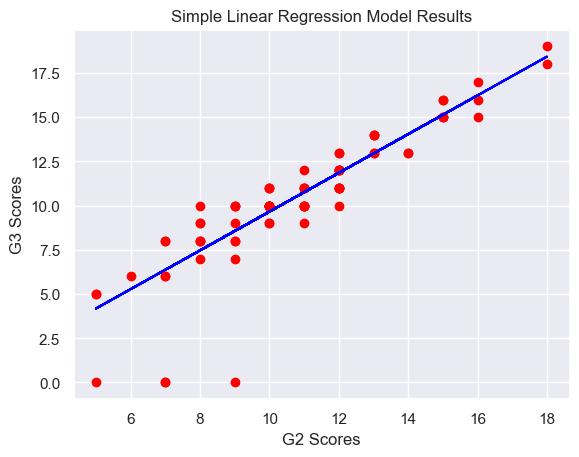

In [84]:
plt.scatter(X_test[:, -1].reshape(-1,1), y_test, color='red')
plt.plot(X_test[:, -1].reshape(-1,1), y_hat_simple_linear, color='blue')

plt.xlabel('G2 Scores')
plt.ylabel('G3 Scores')
plt.title('Simple Linear Regression Model Results')
plt.savefig('simple_linear_regression_results.png')

### 2. Multiple Linear Regression Model <a id='multiple'>
- Multiple linear regression is a statistical method used to model the relationship between multiple independent variables (X1, X2, ..., Xn) and a single dependent variable (Y). 
- In multiple linear regression, the relationship between the independent variables and the dependent variable is modeled using a linear equation of the form: `Y = b0 + b1X1 + b2X2 + ... + bnXn` where Y is the dependent variable, X1, X2, ..., Xn are the independent variables, b0 is the y-intercept, and b1, b2, ..., bn are the regression coefficients. 
- Each regression coefficient represents the change in the dependent variable associated with a one-unit change in the corresponding independent variable, while holding all other independent variables constant.
- The goal of multiple linear regression is to estimate the values of the regression coefficients that provide the best fit for the observed data.
- This is done by minimizing the sum of the squared differences between the observed values of Y and the values predicted by the linear equation. 
- The resulting model can then be used to make predictions about the dependent variable for new values of the independent variables.

In [44]:
from sklearn.linear_model import LinearRegression

multiple_linear_regressor = LinearRegression()
multiple_linear_regressor.fit(X_train, y_train)

LinearRegression()

The intercepted part(a)?

In [45]:
multiple_linear_regressor.intercept_

0.36823197127502816

The coefficints (b)?

In [46]:
multiple_linear_regressor.coef_

array([ 7.13365001e-01,  1.32437526e-01, -3.19440604e-01, -1.66436285e-01,
        1.61048236e-01, -8.85709837e-02,  1.70231007e-01, -7.12214388e-02,
       -4.74794922e-02, -4.84993844e-02,  7.23231995e-02,  6.42443320e-02,
        6.85318259e-02, -7.82997392e-02, -1.09279248e-01,  3.96801595e-02,
        1.30693770e-02, -4.45476875e-04, -4.62256847e-01, -2.89174379e-01,
        1.01490555e+00, -1.94580575e-01, -2.45937840e-01,  3.76420113e-01,
        8.30632339e-02,  1.63469989e-01, -1.60962230e-01,  7.37881436e-02,
        1.24155082e-01,  4.45586105e-02,  1.68270590e-01,  9.59606962e-01])

Test the simple Linear Regression Model on the test data

In [47]:
y_hat_multiple_linear = multiple_linear_regressor.predict(X_test)

/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Multiple Linear Regression: Actual VS Predicted G3 scores')

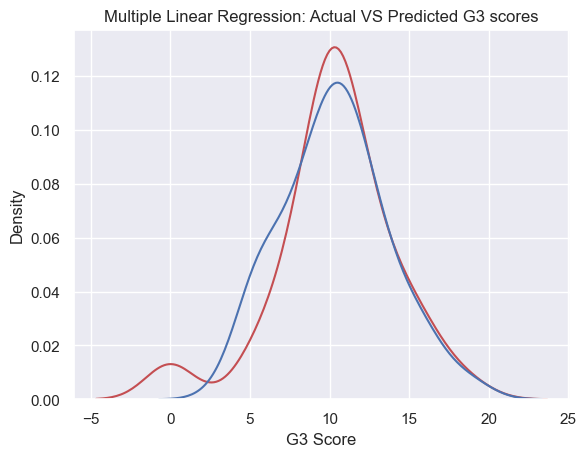

In [48]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_hat_multiple_linear, hist=False, color='b', label='b')

plt.xlabel("G3 Score")
plt.title('Multiple Linear Regression: Actual VS Predicted G3 scores')

### 3. Polynomial Regression Model <a id='poly'>
- Polynomial regression is a type of regression analysis in which the relationship between the independent variable and dependent variable is modeled as an nth-degree polynomial. (In other words, it fits a polynomial equation to the data points.)
- Polynomial regression can be useful when the data does not fit a linear relationship.
- The mathematical representation of a polynomial regression model is given by: `y = β0 + β1x + β2x^2 + β3x^3 + ... + βnx^n + ε` where y is the dependent variable, x is the independent variable, β0, β1, β2, ... βn are the coefficients of the model, n is the degree of the polynomial, and ε is the error term.
- The goal of polynomial regression is to find the values of the coefficients β0, β1, β2, ... βn that minimize the sum of the squared errors between the predicted values and the actual values. 
- This is typically done using a method called ordinary least squares (OLS) regression.
- By adjusting the coefficients of the model, we can fit a curve to the data points that captures the relationship between the variables.

In [49]:
# Degree = 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_2_x = PolynomialFeatures(degree=2).fit_transform(X_train[:, -1].reshape(-1,1))
poly_2_regressor = LinearRegression()
poly_2_regressor.fit(poly_2_x, y_train)

LinearRegression()

The intercepted part(a)?

In [50]:
poly_2_regressor.intercept_

-0.7779547083536542

The coefficints (b)?

In [51]:
poly_2_regressor.coef_

array([0.        , 0.96725972, 0.00657756])

Test the Polynomial (degree=2) Regression Model on the test data

In [52]:
y_hat_polynomial_2 = poly_2_regressor.predict(PolynomialFeatures(degree=2).fit_transform(X_test[:, -1].reshape(-1,1)))

/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Polynomial Regression (degree=2): Actual VS Predicted G3 scores')

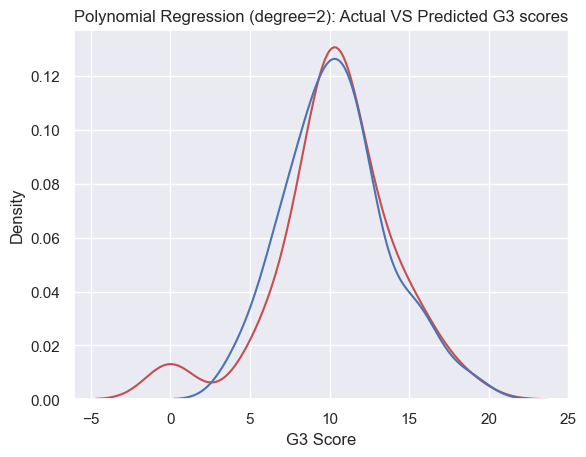

In [53]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_hat_polynomial_2, hist=False, color='b', label='b')

plt.xlabel("G3 Score")
plt.title('Polynomial Regression (degree=2): Actual VS Predicted G3 scores')

In [54]:
# Degree = 3
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_3_x = PolynomialFeatures(degree=3).fit_transform(X_train[:, -1].reshape(-1,1))
poly_3_regressor = LinearRegression()
poly_3_regressor.fit(poly_3_x, y_train)

LinearRegression()

The intercepted part(a)?

In [55]:
poly_3_regressor.intercept_

-0.16632154900865537

The coefficints (b)?

In [56]:
poly_3_regressor.coef_

array([ 0.        ,  0.46723512,  0.07626179, -0.00255101])

Test the Polynomial (degree=2) Regression Model on the test data

In [57]:
y_hat_polynomial_3 = poly_3_regressor.predict(PolynomialFeatures(degree=3).fit_transform(X_test[:, -1].reshape(-1,1)))

/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Polynomial Regression (degree=3): Actual VS Predicted G3 scores')

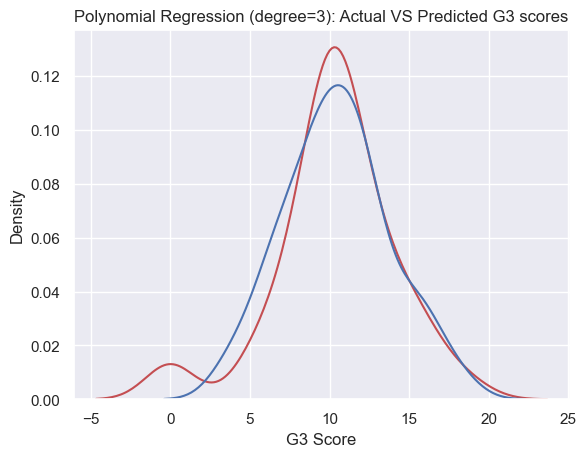

In [58]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_hat_polynomial_3, hist=False, color='b', label='b')

plt.xlabel("G3 Score")
plt.title('Polynomial Regression (degree=3): Actual VS Predicted G3 scores')

In [59]:
# Degree = 4
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_4_x = PolynomialFeatures(degree=4).fit_transform(X_train[:, -1].reshape(-1,1))
poly_4_regressor = LinearRegression()
poly_4_regressor.fit(poly_4_x, y_train)

LinearRegression()

The intercepted part(a)?

In [60]:
poly_4_regressor.intercept_

-0.029182070608316124

The coefficints (b)?

In [61]:
poly_4_regressor.coef_

array([ 0.        , -0.09885221,  0.22045734, -0.01442381,  0.00031196])

Test the Polynomial (degree=2) Regression Model on the test data

In [62]:
y_hat_polynomial_4 = poly_4_regressor.predict(PolynomialFeatures(degree=4).fit_transform(X_test[:, -1].reshape(-1,1)))

/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


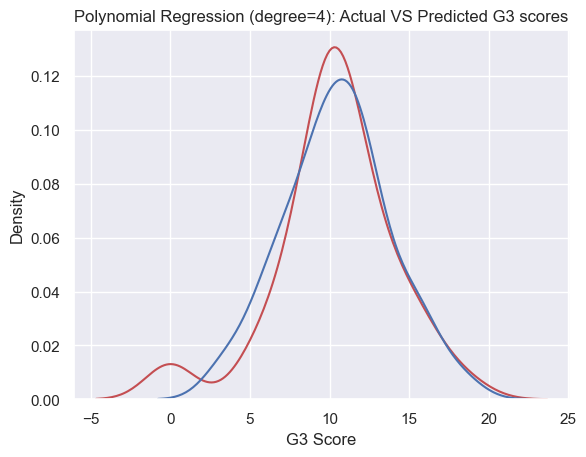

In [85]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_hat_polynomial_4, hist=False, color='b', label='b')

plt.xlabel("G3 Score")
plt.title('Polynomial Regression (degree=4): Actual VS Predicted G3 scores')
plt.savefig('polynomial_linear_regression_results.png')

In [64]:
# Degree = 5
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_5_x = PolynomialFeatures(degree=5).fit_transform(X_train[:, -1].reshape(-1,1))
poly_5_regressor = LinearRegression()
poly_5_regressor.fit(poly_5_x, y_train)

LinearRegression()

The intercepted part(a)?

In [65]:
poly_5_regressor.intercept_

-0.014261551464683109

The coefficints (b)?

In [66]:
poly_5_regressor.coef_

array([ 0.00000000e+00, -5.33588430e-01,  3.85585265e-01, -3.66887101e-02,
        1.57989138e-03, -2.58913286e-05])

Test the Polynomial (degree=2) Regression Model on the test data

In [67]:
y_hat_polynomial_5 = poly_5_regressor.predict(PolynomialFeatures(degree=5).fit_transform(X_test[:, -1].reshape(-1,1)))

/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Polynomial Regression (degree=5): Actual VS Predicted G3 scores')

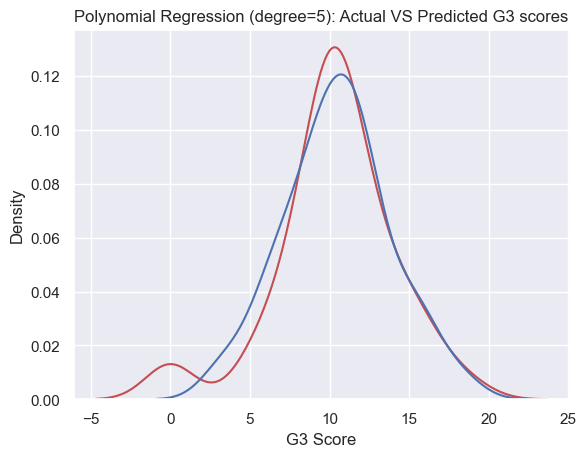

In [68]:
sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_hat_polynomial_5, hist=False, color='b', label='b')

plt.xlabel("G3 Score")
plt.title('Polynomial Regression (degree=5): Actual VS Predicted G3 scores')

### 4. Support Vector Regression(SVR) Model <a id='svr'>
- Support Vector Regression (SVR) is a machine learning algorithm used for regression analysis.
- It works by finding the optimal hyperplane that separates the data into two classes, with a maximum margin between the two classes.
- This hyperplane is determined by the support vectors, which are the data points closest to the hyperplane. 
- The main idea behind SVR is to minimize the error between the predicted values and the actual values, subject to a user-specified tolerance level.


In [69]:
# feature scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_temp = sc_X.fit_transform(X_train)
y_train_temp = sc_y.fit_transform(y_train.reshape(-1,1))

In [70]:
# model training
from sklearn.svm import SVR

svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X_train_temp,y_train_temp.reshape(len(y_train),))

SVR()

In [71]:
y_hat_svr = sc_y.inverse_transform(svr_regressor.predict(sc_X.fit_transform(X_test)).reshape(-1,1))


/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/zaghloul2012/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Support Vector Regression: Actual VS Predicted G3 scores')

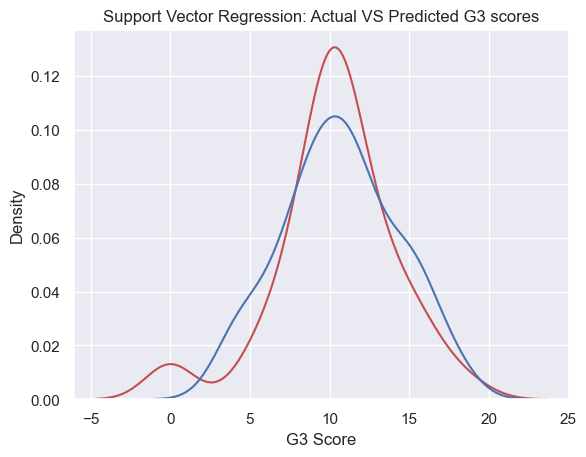

In [72]:
#Visualizing the SVR results

sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_hat_svr, hist=False, color='b', label='b')

plt.xlabel("G3 Score")
plt.title('Support Vector Regression: Actual VS Predicted G3 scores')

### 5. Decision Tree Regression <a id='tree'>
- Decision Tree Regression is a machine learning algorithm used for regression analysis. 
- It works by partitioning the data into smaller subsets, based on the values of the input features, and fitting a decision tree to predict the output variable.
- The decision tree consists of internal nodes that represent the input features, and leaf nodes that represent the predicted output values. 
- The algorithm uses a top-down greedy approach to recursively partition the data, by selecting the feature that provides the best split at each node. 
- The best split is determined by minimizing the sum of squared errors, which is the difference between the predicted and actual values.

In [73]:
# model training
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor = DecisionTreeRegressor(random_state=0)
decision_tree_regressor.fit(X_train,y_train)


DecisionTreeRegressor(random_state=0)

In [74]:
# X_grid = np.arange(min(X_test), max(X_test), 0.01)
y_hat_decision_tree = decision_tree_regressor.predict(X_test)

In [75]:
y_hat_decision_tree

array([ 6., 10.,  9.,  9.,  9., 10.,  6., 12., 12.,  8., 11., 14.,  8.,
        8.,  9., 12., 16., 15.,  6., 10., 11., 18., 10., 12., 16.,  5.,
       11.,  8.,  9., 13., 12., 12.,  9., 11., 13.,  8., 11., 10.,  8.,
       12., 10., 11., 17., 10., 10., 11., 18., 10., 14.,  9.,  5., 12.,
       12.,  5.,  5., 10.,  5., 16., 10.,  0.,  6.,  9., 13., 15., 15.,
       10., 12., 15., 10.,  8., 15., 11., 14., 15., 13.,  9., 12., 12.,
       12.])

## Model Evaluation and Selection <a id='eval'>
- Model evaluation is a crucial step in machine learning, as it allows us to determine the performance of our models and select the best one for a given task. 
- There are several methods for evaluating and selecting models, including holdout validation, k-fold cross-validation, and leave-one-out cross-validation. 
    - Holdout validation involves splitting the dataset into a training set and a validation set, and using the training set to fit the model and the validation set to evaluate its performance. 
    - K-fold cross-validation involves splitting the dataset into k equal subsets, using k-1 subsets for training and the remaining subset for validation, and repeating this process k times. 
    - Leave-one-out cross-validation is similar to k-fold cross-validation, but uses a single example for validation and the remaining examples for training.

Once we have evaluated the performance of our models, we can select the best one based on various criteria, such as accuracy, precision, recall, and F1 score.

In our case we will use R-square which is one of the most known measures in statistics

### 1. Simple Linear Regression

In [76]:
from sklearn.metrics import r2_score

eval_simple_linear = r2_score(y_test, y_hat_simple_linear)
eval_simple_linear

0.7818848166971013

### 2. Multiple Linear Regression

In [77]:
from sklearn.metrics import r2_score

eval_multiple_linear = r2_score(y_test, y_hat_multiple_linear)
eval_multiple_linear

0.736627349028625

### 3. Polynomial Linear Regression

In [78]:
# degree 2
from sklearn.metrics import r2_score

eval_poly_2_linear = r2_score(y_test, y_hat_polynomial_2)
eval_poly_2_linear

0.7819464192501769

In [79]:
# degree 3
from sklearn.metrics import r2_score

eval_poly_3_linear = r2_score(y_test, y_hat_polynomial_3)
eval_poly_3_linear

0.7841989979595217

In [80]:
# degree 4
from sklearn.metrics import r2_score

eval_poly_4_linear = r2_score(y_test, y_hat_polynomial_4)
eval_poly_4_linear

0.7853850281457238

### 4. Support Vector Regression

In [81]:
from sklearn.metrics import r2_score

eval_support_vector = r2_score(y_test, y_hat_svr)
eval_support_vector

0.7206785640823163

### 5. Decision Tree Regression

In [82]:
from sklearn.metrics import r2_score

eval_decision_tree = r2_score(y_test, y_hat_decision_tree)
eval_decision_tree

0.7620537702458806

In [ ]:
For the sake

In [83]:
from sklearn.metrics import mean_squared_error
t = mean_squared_error(y_test, y_hat_simple_linear)
np.sqrt(t)

1.726857699667799

## Conclusion  <a id='conc'>
In conclusion, we have explored two different regression models to analyze a given dataset. The first model, simple linear regression, used the score of the past year as a predictor and achieved an accuracy of 78%.

The second model, polynomial linear regression, allowed for more complex data to be used in the fitting process and also achieved an accuracy of 78%.

Ultimately, the choice between these two models will depend on the specific data being analyzed, as well as the goals of the analysis. It is worth noting that, in a real-world scenario, additional variables may need to be considered to make more accurate predictions. 

To evaluate our model's performance, we calculated the root mean squared error. This metric was used in the original paper and our model outperformed the model developed in the paper.
    
However, the results of this analysis suggest that past scores may be a useful predictor of future outcomes, and that G2 scores may be an important factor to consider in making future predictions.